In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
%matplotlib inline
import random
import os
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 119kB/s 


**IMPORTING DATA**

In [ ]:
df = pd.read_csv("/content/Churn.csv")
df.head()


customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [ ]:
df.shape

(7043, 21)

**UNDERSTANDING DATA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


dealing with Missisng Values

In [ ]:

# mode = df["TotalCharges"].mode()
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)   #fill with mean

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df.drop(["customerID"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

DATA MANUPLATION

In [ ]:
df1=df.copy()

In [ ]:
num_columns=["tenure","MonthlyCharges","TotalCharges"]
num_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
cate_columns = []
for col in df1.select_dtypes('object').columns:
    print(col)
    cate_columns.append(col)
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [ ]:
cate_columns.remove("Churn")

In [ ]:
cate_columns.append("SeniorCitizen")

In [ ]:
cate_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [ ]:
df1.head()

gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0       0              0        1  ...           29.85         29.85      0
1       1              0        0  ...           56.95       1889.50      0
2       1              0        0  ...           53.85        108.15      1
3       1              0        0  ...           42.30       1840.75      0
4       0              0        0  ...           70.70        151.65      1

[5 rows x 20 columns]

In [ ]:
df.head()

gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
0  Female              0     Yes  ...          29.85         29.85    No
1    Male              0      No  ...          56.95       1889.50    No
2    Male              0      No  ...          53.85        108.15   Yes
3    Male              0      No  ...          42.30       1840.75    No
4  Female              0      No  ...          70.70        151.65   Yes

[5 rows x 20 columns]

VISUALIZATION

In [486]:
Counter(df["PaymentMethod"])     #positive class is less then neg class

#class imbalence case


Counter({'Bank transfer (automatic)': 1544,
         'Credit card (automatic)': 1522,
         'Electronic check': 2365,
         'Mailed check': 1612})

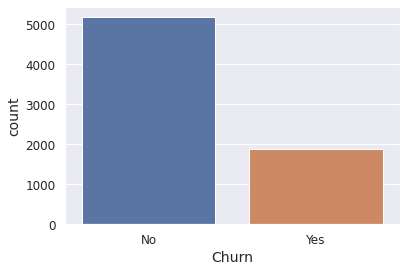

In [ ]:
sns.countplot(df['Churn'])

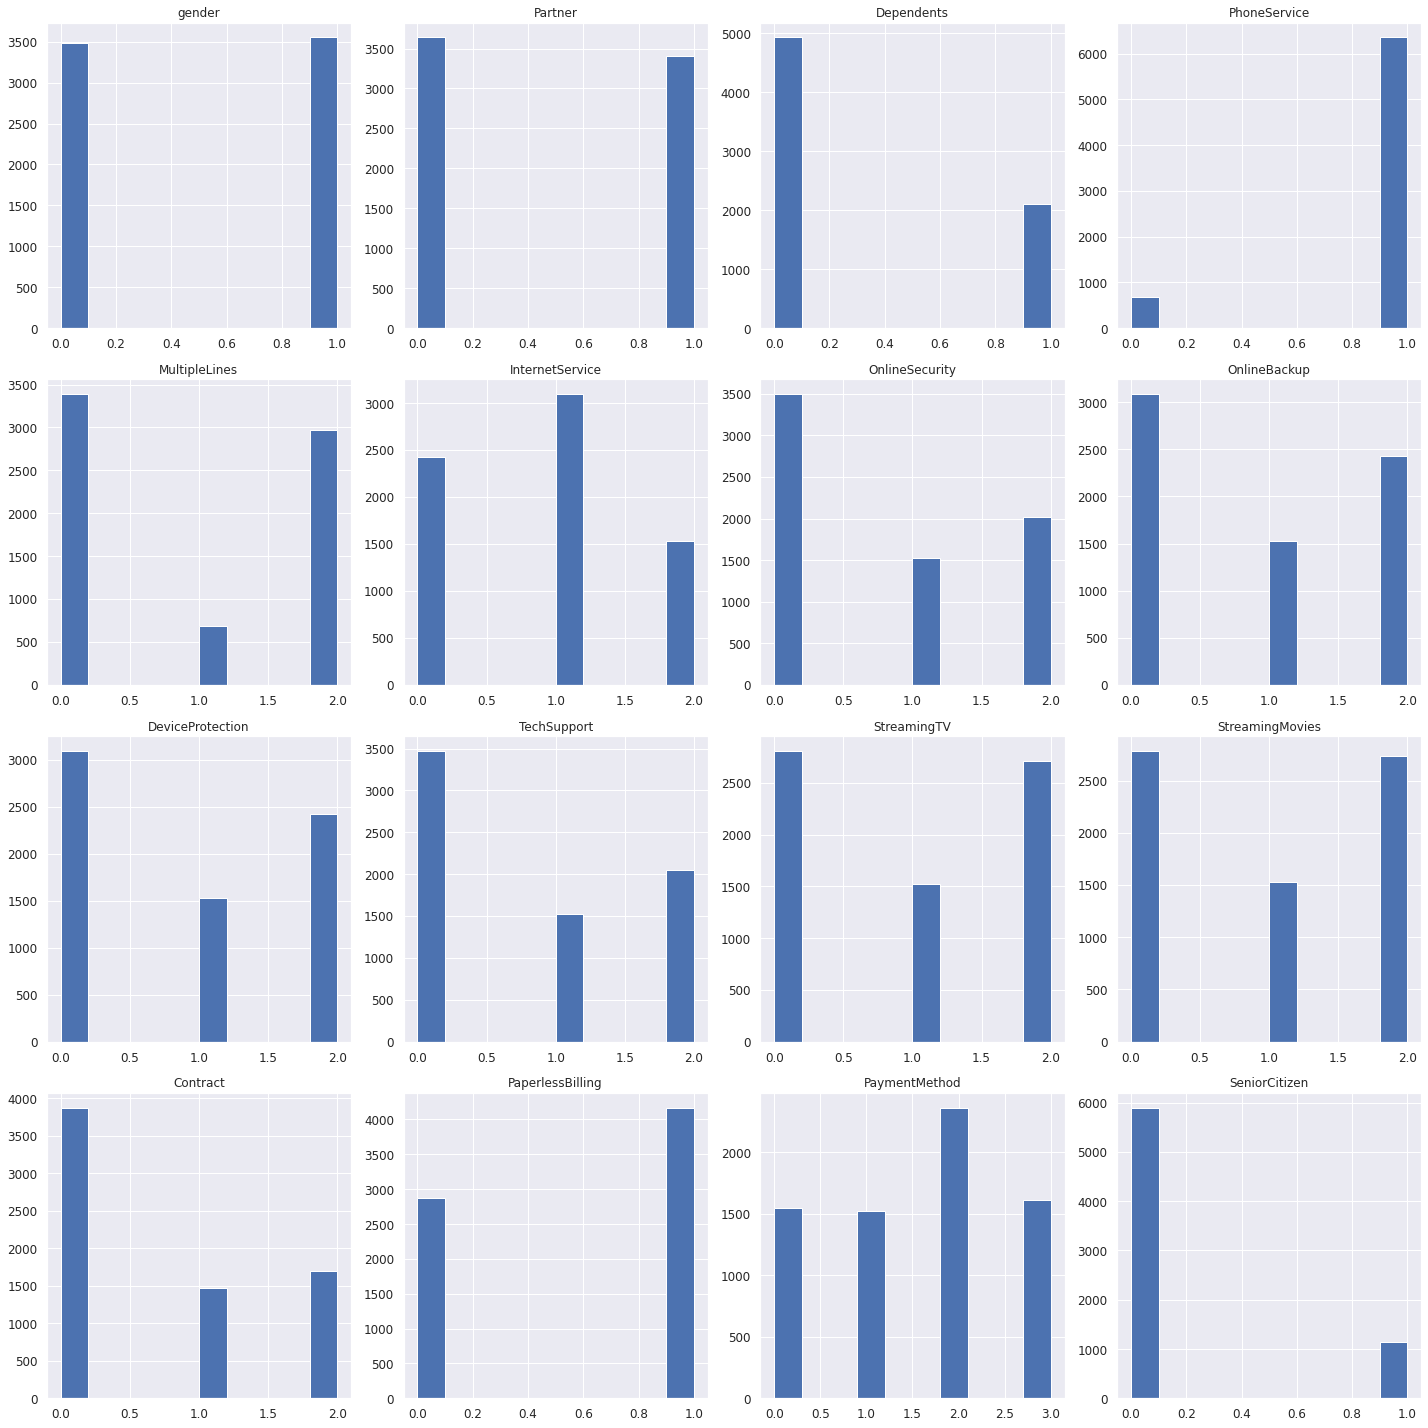

In [ ]:
df1[cate_columns].hist(figsize=(20,20))
plt.tight_layout()

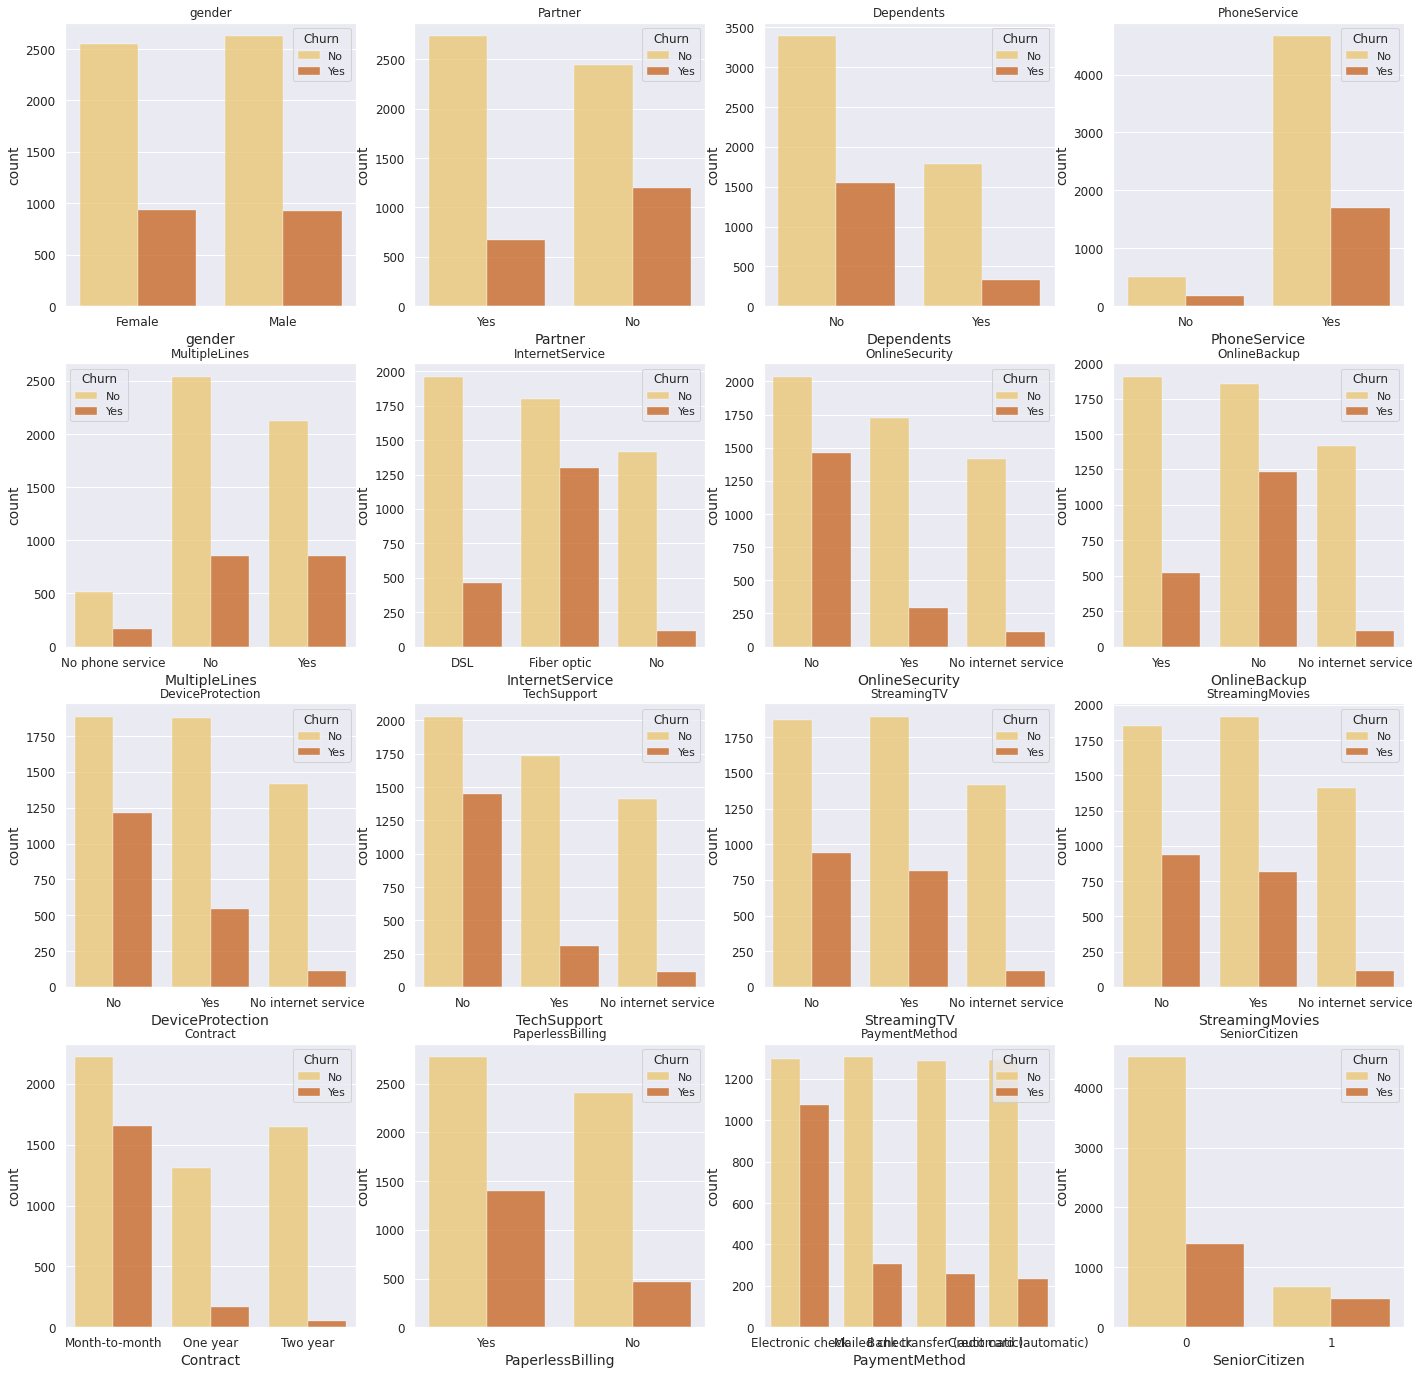

In [ ]:
plt.figure(figsize=(24,24))
for i,j in enumerate(cate_columns):
  plt.subplot(4,4,i+1)
  ax = sns.countplot(x=j,hue="Churn",data=df,palette="YlOrBr",alpha=0.8,linewidth = 0.4)
  ax.set_title(j)

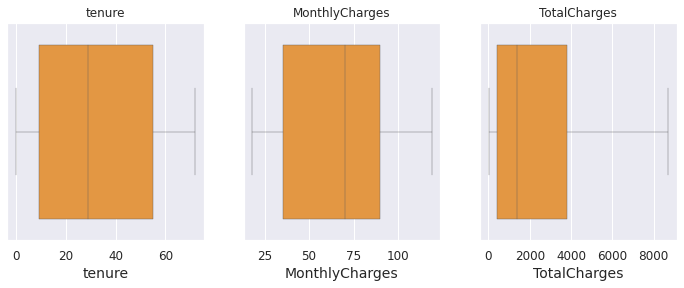

In [ ]:
plt.figure(figsize=(12,4))
for i,j in enumerate(num_columns):
  plt.subplot(1,3,i+1)
  ax = sns.boxplot(x=j,hue="Churn",data=df[["Churn",j]],palette="YlOrBr",linewidth = 0.4)
  ax.set_title(j)

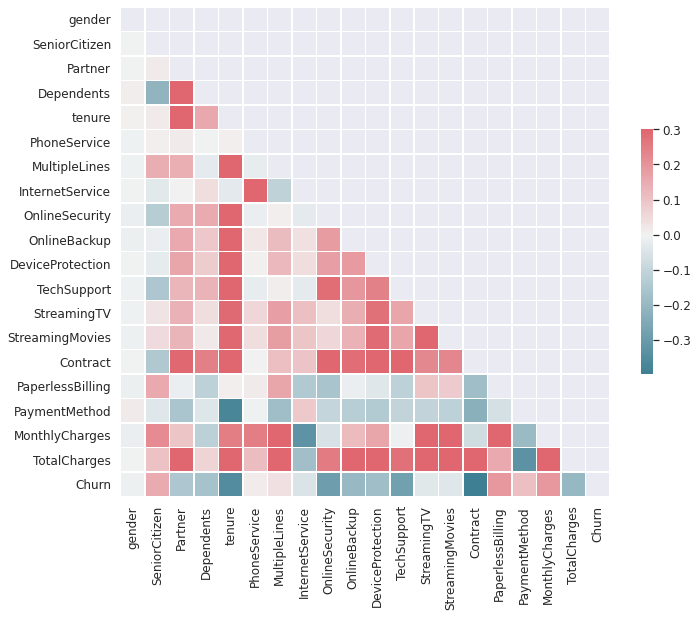

In [ ]:
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Correlation Matrix')

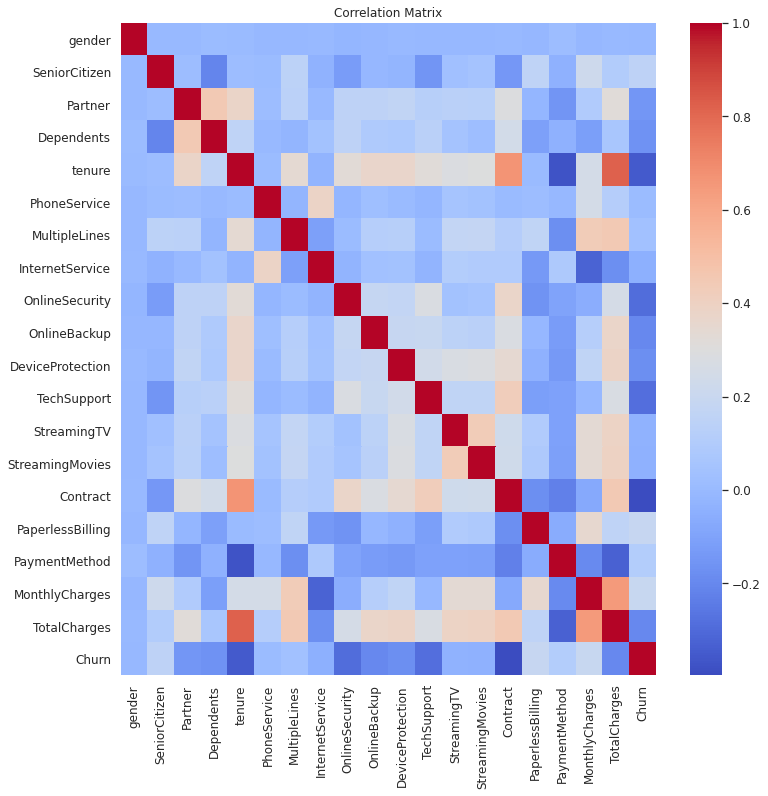

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

**Machine Learning IMPLEMANTATION**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df1.dtypes


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
y=df1["Churn"]
df1.drop(["Churn"],axis=1,inplace=True)
df1.shape

(7043, 19)

Spiliting tha data in training and testing set.

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(df1,y,test_size=0.30)


In [ ]:
num_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

Normalisation of Data

In [ ]:
scaler = StandardScaler()
train_x[num_columns] = scaler.fit_transform(train_x[num_columns])


test_x[num_columns] = scaler.transform(test_x[num_columns])

print('Training labels shape:', train_x[num_columns].shape)
print('Test labels shape:', test_x[num_columns].shape)

print('Training features shape:', train_y.shape)
print('Test features shape:', test_y.shape)

Training labels shape: (4930, 3)
Test labels shape: (2113, 3)
Training features shape: (4930,)
Test features shape: (2113,)


In [ ]:
train_x[num_columns]

tenure  MonthlyCharges  TotalCharges
5564  0.098254       -0.312182     -0.165338
4431 -0.593674        0.168962     -0.474621
4221 -1.285602       -1.500988     -1.004007
3363  0.993689       -0.237778      0.425468
564  -1.041392       -0.012913     -0.816156
...        ...             ...           ...
5476 -1.122795        0.666641     -0.829541
136  -0.390166        0.340918     -0.229445
1428 -1.285602       -0.470910     -0.990292
1066  0.586673       -1.489414     -0.584056
5953 -1.285602       -0.462643     -0.990182

[4930 rows x 3 columns]

For Class Imbalence Problem Calculation of class weight

In [405]:
neg, pos = np.bincount(train_y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 4930
    Positive: 1300 (26.37% of total)



In [406]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.68
Weight for class 1: 1.90


In [407]:
scale_pos_weight =neg/pos
scale_pos_weight

2.792307692307692

Logistics Regression 



In [368]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight=class_weight,penalty="l2",max_iter=1000)
lr.fit(train_x, train_y)


LogisticRegression(C=1.0,
                   class_weight={0: 0.9999999999999999, 1: 0.9999999999999999},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=1000, multi_class='auto',
                   n_jobs=None, penalty='l2', random_state=None,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [408]:
def plot_cm(labels, predictions, p=0.5
            ):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')


  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))



In [409]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

The f1 score for the testing data: 0.6136363636363636
(True Negatives):  1381
 (False Positives):  163
(False Negatives):  245
 (True Positives):  324
Total Transactions:  569


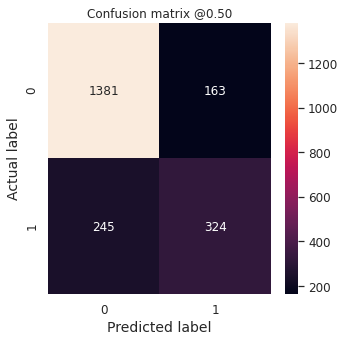

In [410]:
pred_test_lr = lr.predict(test_x)
#print(pred_test)

#Calculating and printing the f1 score 
f1_test = f1_score(test_y, pred_test_lr)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
plot_cm(test_y, pred_test_lr)

In [411]:
print("Accuracy:",accuracy_score(test_y, pred_test_lr))
print("Precision:",precision_score(test_y, pred_test_lr))
print("Recall:",recall_score(test_y, pred_test_lr))

Accuracy: 0.8069096071935636
Precision: 0.6652977412731006
Recall: 0.5694200351493849


In [412]:
roc_score = roc_auc_score(test_y,pred_test_lr)
print(roc_score)

0.7319250434814281


XGB Classifier

In [413]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight=scale_pos_weight)
classifier.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.792307692307692,
              seed=None, silent=None, subsample=1, verbosity=1)

The f1 score for the testing data: 0.6480599046970729
(True Negatives):  1120
 (False Positives):  424
(False Negatives):  93
 (True Positives):  476
Total Transactions:  569


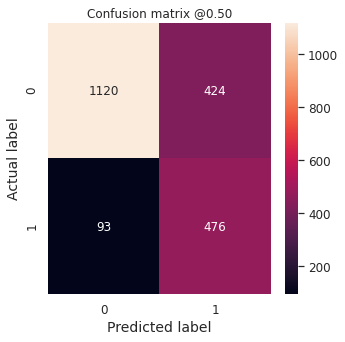

In [438]:
pred_test_xgb = classifier.predict(test_x)
pred_prob_lgb = classifier.predict_proba(test_x)[:,1]
#print(pred_test)

#Calculating and printing the f1 score 
f1_test = f1_score(test_y, pred_test_xgb)
print('The f1 score for the testing data:', f1_test)
plot_cm(test_y, pred_test_xgb)

In [415]:
print("Accuracy:",accuracy_score(test_y, pred_test_xgb))
print("Precision:",precision_score(test_y, pred_test_xgb))
print("Recall:",recall_score(test_y, pred_test_xgb))

Accuracy: 0.7553241836251775
Precision: 0.5288888888888889
Recall: 0.836555360281195


In [439]:
roc_score = roc_auc_score(test_y,pred_prob_lgb)
print(roc_score)

0.8542416019377692


LGBM Classifier

In [417]:
cat_features_index = [i for i,col in enumerate(df1.columns) if col in cate_columns]
cat_features_index

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [418]:
NUM_OF_BOOST_ROUND = 5000
EARLY_STOPPING = 300
params = {
    'cat_features' : cat_features_index,
    'metric': 'auc',
    'seed': 1999,
    'n_estimators': NUM_OF_BOOST_ROUND
}

In [419]:
clf = lgb.LGBMClassifier(**params,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4)

In [420]:
clf.fit(train_x, train_y, verbose=10)

LGBMClassifier(boosting_type='gbdt',
               cat_features=[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                             16],
               class_weight=None, colsample_bytree=0.5, importance_type='split',
               learning_rate=0.05, max_depth=-1, metric='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=5000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=4, reg_lambda=0.0, seed=1999,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

The f1 score for the testing data: 0.5850340136054422
(True Negatives):  1385
 (False Positives):  159
(False Negatives):  268
 (True Positives):  301
Total Transactions:  569


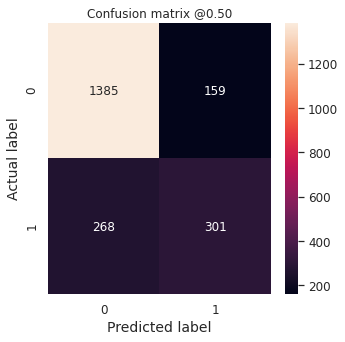

In [421]:
pred_test_lgbm = clf.predict(test_x)
#print(pred_test)

#Calculating and printing the f1 score 
f1_test = f1_score(test_y, pred_test_lgbm)
print('The f1 score for the testing data:', f1_test)
plot_cm(test_y, pred_test_lgbm)


In [422]:
print("Accuracy:",accuracy_score(test_y, pred_test_lgbm))
print("Precision:",precision_score(test_y, pred_test_lgbm))
print("Recall:",recall_score(test_y, pred_test_lgbm))

Accuracy: 0.7979176526265973
Precision: 0.6543478260869565
Recall: 0.5289982425307557


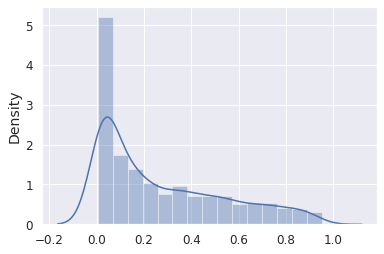

In [436]:
ytest = clf.predict_proba(test_x)[:,1]

sns.distplot(ytest)

In [437]:
roc_score = roc_auc_score(test_y,ytest)
print(roc_score)

0.8501051749729094


Catboost Classifier

In [425]:
from catboost import CatBoostClassifier, Pool

In [426]:
params = {
    'cat_features': cate_columns,
    'eval_metric': 'AUC',
    'random_seed': 1999,
    'n_estimators': NUM_OF_BOOST_ROUND,
}


In [427]:
bst = CatBoostClassifier(**params,class_weights=class_weight,
                      
                      learning_rate=0.01,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,one_hot_max_size=10)
                      # task_type='GPU')
bst.fit(train_x, train_y, plot=True, verbose=10)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 6.74ms	remaining: 33.7s
10:	total: 93.2ms	remaining: 42.3s
20:	total: 138ms	remaining: 32.7s
30:	total: 186ms	remaining: 29.8s
40:	total: 245ms	remaining: 29.6s
50:	total: 326ms	remaining: 31.6s
60:	total: 363ms	remaining: 29.4s
70:	total: 398ms	remaining: 27.6s
80:	total: 436ms	remaining: 26.5s
90:	total: 481ms	remaining: 25.9s
100:	total: 519ms	remaining: 25.2s
110:	total: 585ms	remaining: 25.8s
120:	total: 631ms	remaining: 25.4s
130:	total: 664ms	remaining: 24.7s
140:	total: 716ms	remaining: 24.7s
150:	total: 750ms	remaining: 24.1s
160:	total: 784ms	remaining: 23.6s
170:	total: 822ms	remaining: 23.2s
180:	total: 858ms	remaining: 22.8s
190:	total: 895ms	remaining: 22.5s
200:	total: 942ms	remaining: 22.5s
210:	total: 1.01s	remaining: 22.9s
220:	total: 1.06s	remaining: 22.9s
230:	total: 1.09s	remaining: 22.5s
240:	total: 1.13s	remaining: 22.3s
250:	total: 1.17s	remaining: 22.2s
260:	total: 1.21s	remaining: 22s
270:	total: 1.24s	remaining: 21.7s
280:	total: 1.28s	remaining: 21

The f1 score for the testing data: 0.6295180722891566
(True Negatives):  1203
 (False Positives):  341
(False Negatives):  151
 (True Positives):  418
Total Transactions:  569


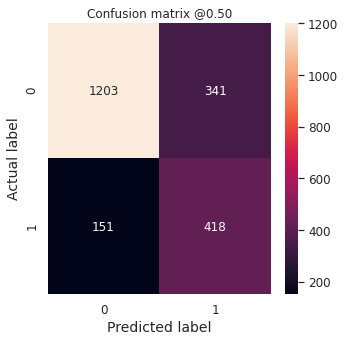

In [428]:
pred_test_cat = bst.predict(test_x)
#print(pred_test)

#Calculating and printing the f1 score 
f1_test = f1_score(test_y, pred_test_cat)
print('The f1 score for the testing data:', f1_test)
plot_cm(test_y, pred_test_cat)

In [429]:
print("Accuracy:",accuracy_score(test_y, pred_test_cat))
print("Precision:",precision_score(test_y, pred_test_cat))
print("Recall:",recall_score(test_y, pred_test_cat))


Accuracy: 0.7671557027922385
Precision: 0.5507246376811594
Recall: 0.7346221441124781


In [430]:
ypred_cat = bst.predict_proba(test_x)[:,1]

In [433]:
roc_auc_score(test_y, ypred_cat)

0.8375086507553474

**Feature Importence**

From the above plot it is visible that features like -
1. TotalCharges
2. Tenure
3. MonthlyCharges
4. Contract
5. Payment Methods 

are more relevent to model predictions.


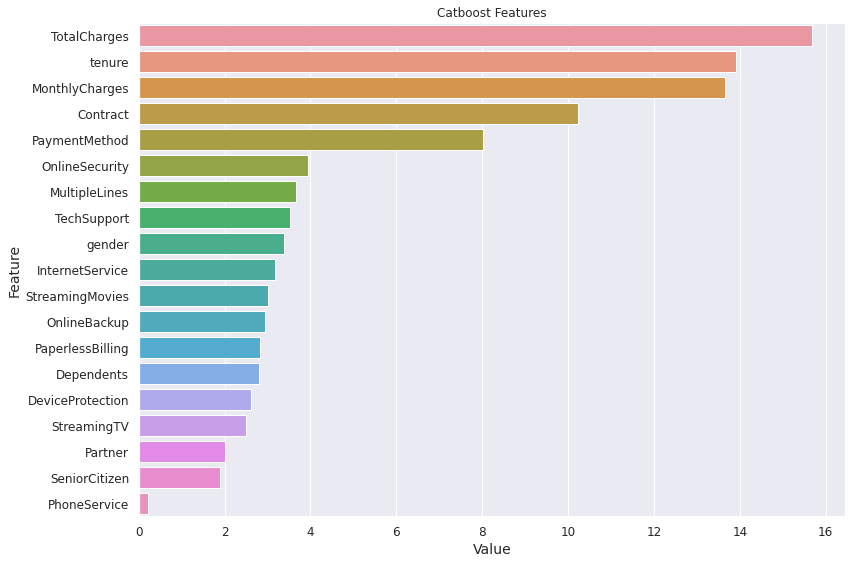

In [396]:
feature_imp = pd.DataFrame(sorted(zip(bst.feature_importances_, train_x.columns), reverse=True), 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()



In [397]:


feat_cols = feature_imp['Feature'][:14].values
feat_cols



array(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract',
       'PaymentMethod', 'OnlineSecurity', 'MultipleLines', 'TechSupport',
       'gender', 'InternetService', 'StreamingMovies', 'OnlineBackup',
       'PaperlessBilling', 'Dependents'], dtype=object)

In [398]:
train_x.shape

(4930, 19)

In [399]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = bst, X = train_x, y = train_y, cv = 10)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
2:	total: 12.1ms	remaining: 20.2s
3:	total: 15.7ms	remaining: 19.6s
4:	total: 19.4ms	remaining: 19.4s
5:	total: 23ms	remaining: 19.1s
6:	total: 26.9ms	remaining: 19.2s
7:	total: 30.7ms	remaining: 19.2s
8:	total: 33.8ms	remaining: 18.8s
9:	total: 36.4ms	remaining: 18.1s
10:	total: 40ms	remaining: 18.1s
11:	total: 43.6ms	remaining: 18.1s
12:	total: 47.3ms	remaining: 18.1s
13:	total: 50.4ms	remaining: 17.9s
14:	total: 55.4ms	remaining: 18.4s
15:	total: 58.3ms	remaining: 18.2s
16:	total: 62ms	remaining: 18.2s
17:	total: 65.9ms	remaining: 18.2s
18:	total: 69.1ms	remaining: 18.1s
19:	total: 72.9ms	remaining: 18.2s
20:	total: 75.6ms	remaining: 17.9s
21:	total: 79.2ms	remaining: 17.9s
22:	total: 83ms	remaining: 18s
23:	total: 86.4ms	remaining: 17.9s
24:	total: 90.4ms	remaining: 18s
25:	total: 92.7ms	remaining: 17.7s
26:	total: 95.7ms	remaining: 17.6s
27:	total: 98.2ms	remaining: 17.4s
28:	total: 101ms	remaining: 17.4s
29:	total: 103ms	remainin

(4930,)

Using DNN

In [402]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [403]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [440]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [441]:
model = Sequential()
model.add(Dense(64, input_dim=19, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='tanh'))
model.add(Dropout(0.2))
# model.add(Dense(6, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [442]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 64)                1280      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_33 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_34 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 12)              

In [443]:
model.compile(
      optimizer=keras.optimizers.SGD(lr=0.045, momentum=0.9),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [444]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [445]:
model.fit(train_x, train_y,batch_size=64,epochs=200,validation_data=(test_x,test_y),shuffle=True,class_weight=class_weight)

Epoch 1/200
78/78 [==============================] - 4s 24ms/step - loss: 0.6797 - tp: 388.2278 - fp: 828.7089 - tn: 1059.3544 - fn: 281.3291 - accuracy: 0.5528 - precision: 0.2977 - recall: 0.5398 - auc: 0.5767 - val_loss: 0.4939 - val_tp: 458.0000 - val_fp: 439.0000 - val_tn: 1105.0000 - val_fn: 111.0000 - val_accuracy: 0.7397 - val_precision: 0.5106 - val_recall: 0.8049 - val_auc: 0.8319
Epoch 2/200
78/78 [==============================] - 0s 4ms/step - loss: 0.6013 - tp: 524.6456 - fp: 662.7595 - tn: 1212.9747 - fn: 157.2405 - accuracy: 0.6810 - precision: 0.4444 - recall: 0.7498 - auc: 0.7514 - val_loss: 0.4987 - val_tp: 450.0000 - val_fp: 394.0000 - val_tn: 1150.0000 - val_fn: 119.0000 - val_accuracy: 0.7572 - val_precision: 0.5332 - val_recall: 0.7909 - val_auc: 0.8381
Epoch 3/200
78/78 [==============================] - 0s 4ms/step - loss: 0.5686 - tp: 530.8861 - fp: 665.6203 - tn: 1234.5823 - fn: 126.5316 - accuracy: 0.6854 - precision: 0.4382 - recall: 0.7979 - auc: 0.7735 - 

In [446]:
predictions = model.predict_classes(test_x)
confusion_matrix(test_y, predictions)

array([[939, 605],
       [ 79, 490]])

In [447]:
confusion_matrix(test_y, predictions)

array([[939, 605],
       [ 79, 490]])

(True Negatives):  939
 (False Positives):  605
(False Negatives):  79
 (True Positives):  490
Total Transactions:  569


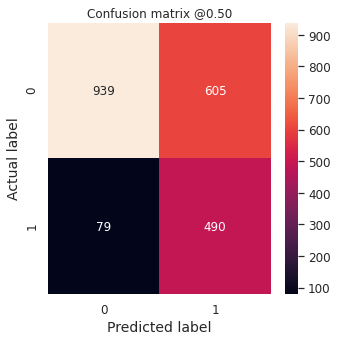

In [448]:
plot_cm(test_y, predictions)

In [449]:
pred = model.predict_proba(test_x)
pred=pred.reshape(-1)

(True Negatives):  939
 (False Positives):  605
(False Negatives):  79
 (True Positives):  490
Total Transactions:  569


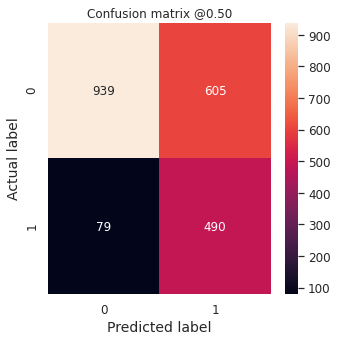

In [450]:

def plot_cm(labels, predictions, p=0.5
            ):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')


  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

plot_cm(test_y,pred) 

In [452]:
print("Accuracy:",accuracy_score(test_y, predictions))
print("Precision:",precision_score(test_y, predictions))
print("Recall:",recall_score(test_y, predictions))

f1_test = f1_score(test_y, predictions)
print('The f1 score for the testing data:', f1_test)
roc_auc_score(test_y, pred)

Accuracy: 0.6762896355892096
Precision: 0.4474885844748858
Recall: 0.8611599297012302
The f1 score for the testing data: 0.5889423076923076


0.8335981678610779

ROC Curve Plot


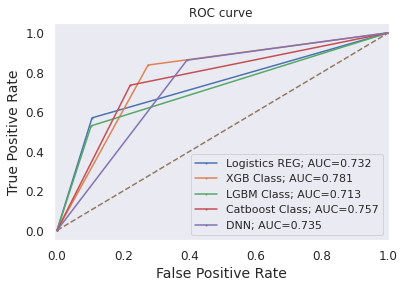

In [454]:
plot_roc([test_y]*5,[pred_test_lr,pred_test_xgb,pred_test_lgbm,pred_test_cat,predictions],["Logistics REG","XGB Class","LGBM Class","Catboost Class","DNN"])

To deal with class imbalence problem we'll use SMOTE over sampling technique

In [162]:
!pip install imbalanced-learn

In [455]:
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [456]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from numpy import where
from imblearn.pipeline import Pipeline
from numpy import mean

In [457]:
counter  =Counter(train_y)
print(counter)
counter_  =Counter(test_y)
counter_

Counter({0: 3630, 1: 1300})


Counter({0: 1544, 1: 569})

In [458]:
smote= SMOTE(sampling_strategy=0.8,random_state=4)
train_x_resample, train_y_resample =  smote.fit_resample(train_x, train_y)

# summarize the new class distribution
counter = Counter(train_y_resample)
print(counter)

Counter({0: 3630, 1: 2904})


In [459]:
train_x_resample = pd.DataFrame(train_x_resample,columns=df1.columns)
train_x_resample.head()

gender  SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges  TotalCharges
0     1.0            0.0      0.0  ...            3.0       -0.312182     -0.165338
1     0.0            0.0      0.0  ...            2.0        0.168962     -0.474621
2     1.0            0.0      0.0  ...            1.0       -1.500988     -1.004007
3     1.0            0.0      1.0  ...            0.0       -0.237778      0.425468
4     1.0            0.0      0.0  ...            0.0       -0.012913     -0.816156

[5 rows x 19 columns]

In [460]:
train_x_resample[cate_columns] =train_x_resample[cate_columns].astype(int)


ML Impletation wuth SMOTE

In [461]:
neg, pos = np.bincount(train_y_resample)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 6534
    Positive: 2904 (44.44% of total)



In [462]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.90
Weight for class 1: 1.12


In [463]:
scale_pos_weight=neg/pos

Logistics Regression


In [464]:
scale_pos_weight =neg/pos
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight=class_weight,penalty="l2",max_iter=2000)
lr.fit(train_x_resample, train_y_resample)


LogisticRegression(C=1.0, class_weight={0: 0.8999999999999999, 1: 1.125},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=2000, multi_class='auto',
                   n_jobs=None, penalty='l2', random_state=None,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [465]:
pred_test_lr_over = lr.predict(test_x)
#print(pred_test)

#Calculating and printing the f1 score 
f1_test = f1_score(test_y, pred_test_lr_over)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(test_y, pred_test_lr_over)

The f1 score for the testing data: 0.6298342541436464


array([[1121,  423],
       [ 113,  456]])

In [466]:
pred=lr.predict_proba(test_x)[:,1]

In [467]:
print("Accuracy:",accuracy_score(test_y, pred_test_lr_over))
print("Precision:",precision_score(test_y, pred_test_lr_over))
print("Recall:",recall_score(test_y, pred_test_lr_over))

Accuracy: 0.7463322290582111
Precision: 0.5187713310580204
Recall: 0.8014059753954306


(True Negatives):  1121
 (False Positives):  423
(False Negatives):  113
 (True Positives):  456
Total Transactions:  569


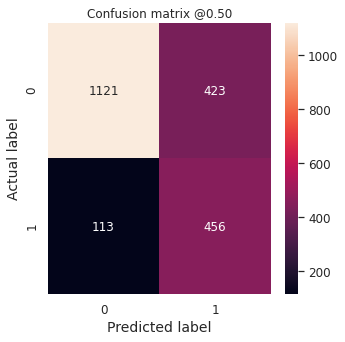

In [468]:
plot_cm(test_y,pred)

In [469]:
roc_score = roc_auc_score(test_y,pred)
print(roc_score)

0.8443097380187038


XGBoost Classifier

In [470]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight=scale_pos_weight)
classifier.fit(train_x_resample, train_y_resample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.25, seed=None,
              silent=None, subsample=1, verbosity=1)

The f1 score for the testing data: 0.635409377186844
(True Negatives):  1138
 (False Positives):  406
(False Negatives):  115
 (True Positives):  454
Total Transactions:  569


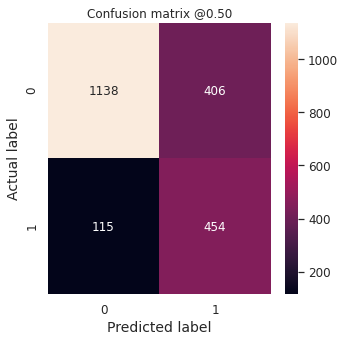

In [471]:
pred_test_xgb_over = classifier.predict(test_x)
#print(pred_test)

#Calculating and printing the f1 score 
f1_test = f1_score(test_y, pred_test_xgb_over)
print('The f1 score for the testing data:', f1_test)

plot_cm(test_y, pred_test_xgb_over)


In [473]:
print("Accuracy:",accuracy_score(test_y, pred_test_xgb_over))
print("Precision:",precision_score(test_y, pred_test_xgb_over))
print("Recall:",recall_score(test_y, pred_test_xgb_over))
pred=classifier.predict_proba(test_x)[:,1]
roc_score = roc_auc_score(test_y,pred)
print("ROC_SCORE: ",roc_score)


Accuracy: 0.7534311405584477
Precision: 0.5279069767441861
Recall: 0.7978910369068541
ROC_SCORE:  0.8442607929555533


LGBM CLASSIFIER

In [474]:
cat_features_index = [i for i,col in enumerate(df1.columns) if col in cate_columns]
cat_features_index

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [475]:
NUM_OF_BOOST_ROUND = 5000
EARLY_STOPPING = 300
params = {
    'cat_features' : cat_features_index,
    'metric': 'auc',
    'seed': 1999,
    'n_estimators': NUM_OF_BOOST_ROUND
}

In [476]:
clf = lgb.LGBMClassifier(**params,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4)
clf.fit(train_x_resample, train_y_resample, verbose=10)

LGBMClassifier(boosting_type='gbdt',
               cat_features=[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                             16],
               class_weight=None, colsample_bytree=0.5, importance_type='split',
               learning_rate=0.05, max_depth=-1, metric='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=5000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=4, reg_lambda=0.0, seed=1999,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

The f1 score for the testing data: 0.6177669111654442
(True Negatives):  1265
 (False Positives):  279
(False Negatives):  190
 (True Positives):  379
Total Transactions:  569


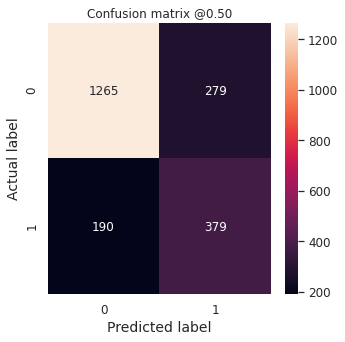

In [477]:
pred_test_lgbm_over = clf.predict(test_x)
#print(pred_test)

#Calculating and printing the f1 score 
f1_test = f1_score(test_y, pred_test_lgbm_over)
print('The f1 score for the testing data:', f1_test)

plot_cm(test_y, pred_test_lgbm_over)


In [478]:
print("Accuracy:",accuracy_score(test_y, pred_test_lgbm_over))
print("Precision:",precision_score(test_y, pred_test_lgbm_over))
print("Recall:",recall_score(test_y, pred_test_lgbm_over))
pred=clf.predict_proba(test_x)[:,1]
roc_score = roc_auc_score(test_y,pred)
print("ROC_SCORE: ",roc_score)


Accuracy: 0.7780407004259347
Precision: 0.5759878419452887
Recall: 0.6660808435852372
ROC_SCORE:  0.8295761357531165


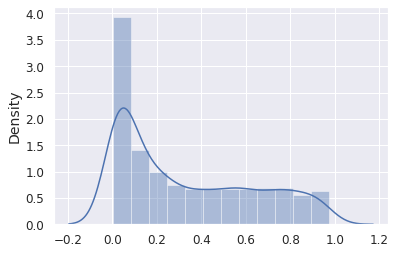

In [479]:
sns.distplot(pred)

CATBOOST Classifier

In [480]:
params = {
    'cat_features': cate_columns,
    'eval_metric': 'AUC',
    'random_seed': 1999,
    'n_estimators': NUM_OF_BOOST_ROUND,
}


In [481]:
cbt = CatBoostClassifier(**params,class_weights=class_weight,
                      
                      learning_rate=0.01,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,one_hot_max_size=10)
                      # task_type='GPU')
cbt.fit(train_x_resample, train_y_resample, plot=True, verbose=10)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 12.4ms	remaining: 1m 2s
10:	total: 134ms	remaining: 1m
20:	total: 251ms	remaining: 59.6s
30:	total: 298ms	remaining: 47.7s
40:	total: 345ms	remaining: 41.7s
50:	total: 393ms	remaining: 38.1s
60:	total: 502ms	remaining: 40.7s
70:	total: 552ms	remaining: 38.3s
80:	total: 597ms	remaining: 36.3s
90:	total: 642ms	remaining: 34.7s
100:	total: 688ms	remaining: 33.4s
110:	total: 751ms	remaining: 33.1s
120:	total: 797ms	remaining: 32.2s
130:	total: 844ms	remaining: 31.4s
140:	total: 889ms	remaining: 30.6s
150:	total: 933ms	remaining: 30s
160:	total: 1.01s	remaining: 30.3s
170:	total: 1.05s	remaining: 29.8s
180:	total: 1.1s	remaining: 29.3s
190:	total: 1.14s	remaining: 28.7s
200:	total: 1.19s	remaining: 28.3s
210:	total: 1.24s	remaining: 28.2s
220:	total: 1.29s	remaining: 27.9s
230:	total: 1.33s	remaining: 27.6s
240:	total: 1.38s	remaining: 27.3s
250:	total: 1.43s	remaining: 27.1s
260:	total: 1.5s	remaining: 27.2s
270:	total: 1.54s	remaining: 26.9s
280:	total: 1.61s	remaining: 27.1s
29

The f1 score for the testing data: 0.6158730158730159
(True Negatives):  1241
 (False Positives):  303
(False Negatives):  181
 (True Positives):  388
Total Transactions:  569


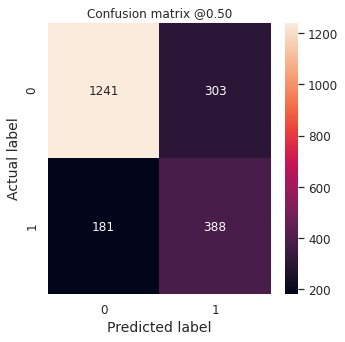

In [482]:
pred_test_cat_over = cbt.predict(test_x)
#print(pred_test)

#Calculating and printing the f1 score 
f1_test = f1_score(test_y, pred_test_cat_over)
print('The f1 score for the testing data:', f1_test)

plot_cm(test_y, pred_test_cat_over)


In [483]:
print("Accuracy:",accuracy_score(test_y, pred_test))
print("Precision:",precision_score(test_y, pred_test))
print("Recall:",recall_score(test_y, pred_test))
pred=cbt.predict_proba(test_x)[:,1]
roc_score = roc_auc_score(test_y,pred)
print("ROC_SCORE: ",roc_score)


Accuracy: 0.7946048272598202
Precision: 0.6439232409381663
Recall: 0.5307557117750439
ROC_SCORE:  0.8348257783403298


In [326]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = cbt, X = train_x_resample, y = train_y_resample, cv = 6)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
2:	total: 12.5ms	remaining: 20.9s
3:	total: 15.9ms	remaining: 19.8s
4:	total: 20.3ms	remaining: 20.3s
5:	total: 24.2ms	remaining: 20.1s
6:	total: 29.8ms	remaining: 21.2s
7:	total: 34.7ms	remaining: 21.6s
8:	total: 39.2ms	remaining: 21.7s
9:	total: 43.7ms	remaining: 21.8s
10:	total: 49.1ms	remaining: 22.3s
11:	total: 54ms	remaining: 22.4s
12:	total: 58.6ms	remaining: 22.5s
13:	total: 63ms	remaining: 22.4s
14:	total: 67.6ms	remaining: 22.5s
15:	total: 72ms	remaining: 22.4s
16:	total: 76.5ms	remaining: 22.4s
17:	total: 80.9ms	remaining: 22.4s
18:	total: 85.3ms	remaining: 22.4s
19:	total: 89.8ms	remaining: 22.4s
20:	total: 94.1ms	remaining: 22.3s
21:	total: 98.5ms	remaining: 22.3s
22:	total: 103ms	remaining: 22.3s
23:	total: 108ms	remaining: 22.4s
24:	total: 113ms	remaining: 22.4s
25:	total: 117ms	remaining: 22.4s
26:	total: 120ms	remaining: 22.2s
27:	total: 125ms	remaining: 22.2s
28:	total: 130ms	remaining: 22.2s
29:	total: 134ms	remainin

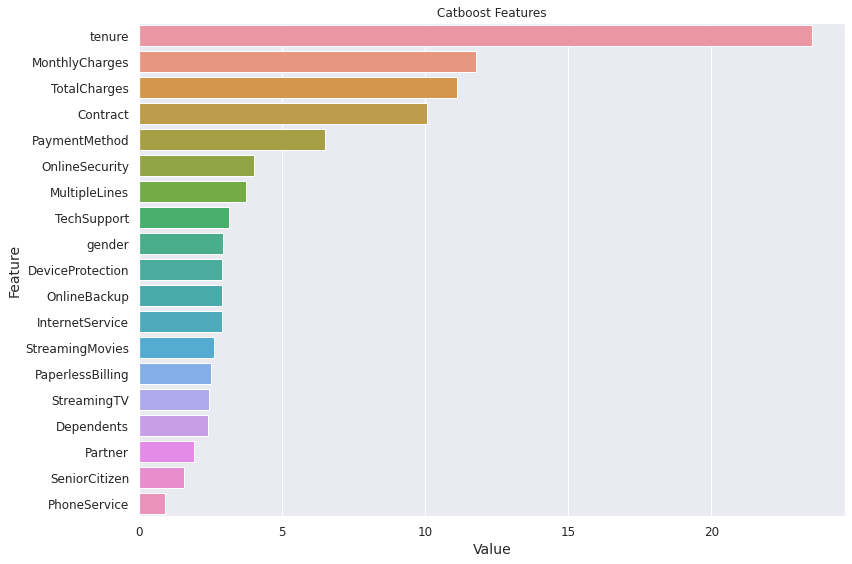

In [484]:
feature_imp = pd.DataFrame(sorted(zip(cbt.feature_importances_, train_x.columns), reverse=True), 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()


Neural Network Model

In [327]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [347]:
model_ = Sequential()
model_.add(Dense(64, input_dim=19, activation='relu'))
model_.add(Dropout(0.25))
model_.add(Dense(32, activation='relu'))
model_.add(Dropout(0.25))
model_.add(Dense(16, activation='relu'))
model_.add(Dropout(0.25))
model_.add(Dense(12, activation='relu'))
model_.add(Dropout(0.25))
model_.add(Dense(8, activation='relu'))
model_.add(Dropout(0.2))
# model.add(Dense(8, activation='relu'))
model_.add(Dense(4, activation='sigmoid'))
model_.add(Dropout(0.2))
# model.add(Dense(6, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
model_.add(Dense(1, activation='sigmoid'))

In [348]:
model_.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                1280      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 12)              

In [364]:
model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-8),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [365]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [366]:
model.fit(train_x_resample, train_y_resample,batch_size=128,epochs=200,validation_split=0.2,shuffle=True,callbacks=[lr_schedule])

Epoch 1/200
46/46 [==============================] - 4s 28ms/step - loss: 28.3072 - tp: 11.9574 - fp: 17.3617 - tn: 1885.4894 - fn: 2603.0638 - accuracy: 0.3783 - precision: 0.3667 - recall: 0.0042 - auc: 0.4968 - val_loss: 85.1554 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 1452.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/200
46/46 [==============================] - 0s 5ms/step - loss: 26.9561 - tp: 6.1277 - fp: 20.2979 - tn: 1919.7447 - fn: 1119.7021 - accuracy: 0.6297 - precision: 0.2189 - recall: 0.0054 - auc: 0.4971 - val_loss: 85.1554 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 1452.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 3/200
46/46 [==============================] - 0s 5ms/step - loss: 27.7508 - tp: 8.8298 - fp: 17.2766 - tn: 1897.9149 - fn: 1141.8511 - accuracy: 0.6212 - precisi

In [367]:
predictions = model_.predict_classes(test_x)
confusion_matrix(test_y, predictions)

array([[1544,    0],
       [ 569,    0]])

In [340]:
pred = model_.predict_proba(test_x)
pred=pred.reshape(-1)

(True Negatives):  32
 (False Positives):  1512
(False Negatives):  21
 (True Positives):  548
Total Transactions:  569


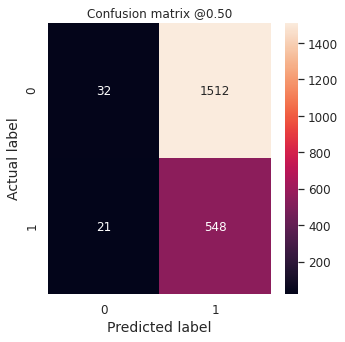

In [343]:

def plot_cm2(labels, predictions, p=0.5
            ):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')


  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

plot_cm2(test_y,pred) 

(True Negatives):  32
 (False Positives):  1512
(False Negatives):  21
 (True Positives):  548
Total Transactions:  569


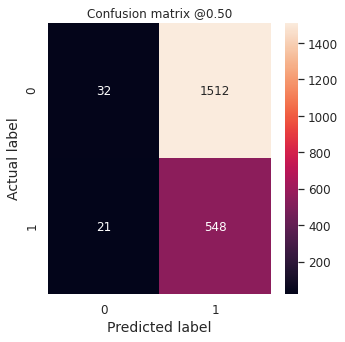

In [338]:
plot_cm(test_y,pred) 

In [339]:
print("Accuracy:",accuracy_score(test_y, predictions))
print("Precision:",precision_score(test_y, predictions))
print("Recall:",recall_score(test_y, predictions))

f1_test = f1_score(test_y, predictions)
print('The f1 score for the testing data:', f1_test)
print("ROC SCORE: ",roc_auc_score(test_y, pred))

Accuracy: 0.27449124467581637
Precision: 0.26601941747572816
Recall: 0.9630931458699473
The f1 score for the testing data: 0.4168885507797642
ROC SCORE:  0.37641826857408234


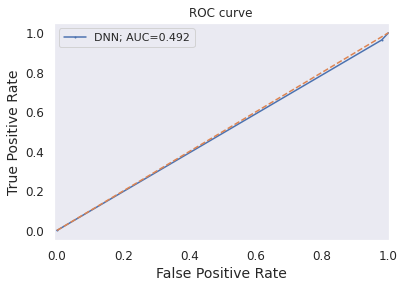

In [346]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

plot_roc([test_y],[predictions],['DNN'])

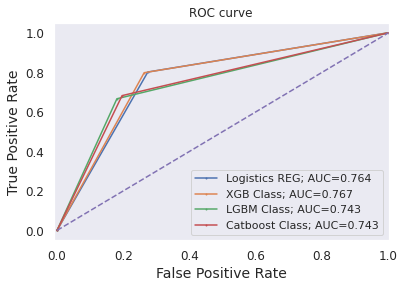

In [485]:
plot_roc([test_y]*4,[pred_test_lr_over,pred_test_xgb_over,pred_test_lgbm_over,pred_test_cat_over],["Logistics REG","XGB Class","LGBM Class","Catboost Class"])

Final Results Based on Machine Learning Classifier

Without Oversampling technique - 
Without Oversampling case XGB Classifier and Catboost Classifier perform better with respect to other on basis of ROC_Score and accuracy

With Over Sampling technique - 
With Over sampling ratio of 0.8 XGboost and LOgistics Regression Classifier performs better on basis of ROC_Score and Accuracy


Results can be further improved using better hyperparameters

* Features like TotalCharges, Tenure, MonthlyCharges, Contract, Payment Methods are having higher effect on Model Predictions. They are strong feature in churn predictions
* Features like Streaming TV, Dependents, Partner, Senior Citizen, Phone Service are having less impact in churn prediction. They either can be removed.

* From EDA few insights can be gain like - \
1. Customer with Electronic Check as payment options are having more churn rate
2. Customer with Fiber Optic as Internet Service are having more chance of churning.
3. High Tenure tends to less Churning. So we should offer more less Tenure options to these customers.
4. Customer with Month-to-month plans have high churning rate so we should offer More Month-to-month plans to customer.
5. Customers with no partners should be offer more Month-to-month plans.
